# Data Analysis of Summer Olympics
### by Prajwal Patil

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("summer.csv")

In [7]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [12]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [15]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

### 1. In how many cities Summer Olympics is held so far?

In [16]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [17]:
print("No: of cites where Olympics is held:",len(df["City"].unique()))

No: of cites where Olympics is held: 22


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

Text(0.5, 1.0, 'Gold Medals per sports')

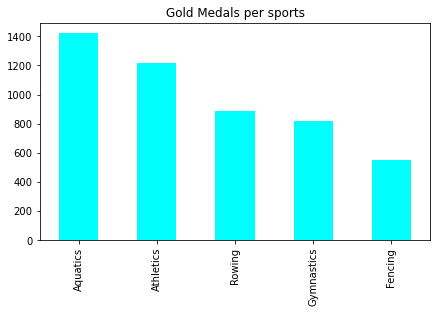

In [41]:
df['Medal'].unique()
gold=df[df['Medal'] == 'Gold']
gold['Sport'].value_counts().head().plot(x='Sport',y='Medal',kind = 'bar', figsize = (7,4),color = 'cyan')
plt.title("Gold Medals per sports")

### 3. Which sport is having most number of medals so far? (Top 5)

Text(0.5, 1.0, 'Most no: of Medals for sports')

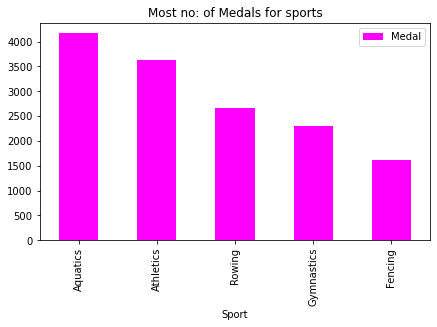

In [42]:
data=[]
for i in df["Sport"].unique():
    data.append([i,len(df[(df['Sport']==i)])])

pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False).head().plot(x = 'Sport', y = 'Medal', kind = 'bar', figsize = (7,4),color = 'magenta')
plt.title("Most no: of Medals for sports")

### 4. Which player has won most number of medals?

Text(0.5, 1.0, 'Most no: of Medals for players')

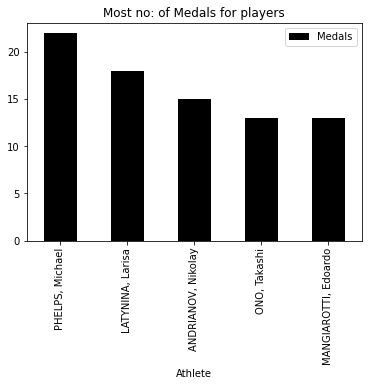

In [23]:
data=[]
for i in df['Athlete'].unique():
    data.append([i,len(df[df['Athlete']==i])])

pd.DataFrame(data,columns = ['Athlete','Medals']).sort_values(by='Medals', ascending=False).head().plot(x = 'Athlete', y = 'Medals', kind = 'bar', figsize = (6,4),color = 'black')
plt.title("Most no: of Medals for players")

### 5. Which player has won most number Gold Medals of medals? (Top 5)

Text(0.5, 1.0, 'Most no: of Gold Medals for players')

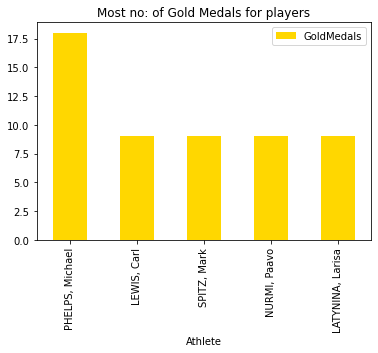

In [24]:
data=[]
for i in df["Athlete"].unique():
    data.append([i,len(df[(df['Athlete']==i) & (df['Medal']=="Gold") ])])
    
pd.DataFrame(data,columns = ['Athlete','GoldMedals']).sort_values(by='GoldMedals', ascending=False).head().plot(x = 'Athlete', y = 'GoldMedals', kind = 'bar', figsize = (6,4),color = 'gold')
plt.title("Most no: of Gold Medals for players")

### 6. In which year India won first Gold Medal in Summer Olympics?

In [25]:
df_Gold = df[df['Medal'] == 'Gold']
df_Ind = df_Gold[df_Gold['Country'] == 'IND']
 
data = []
for i in df_Ind['Year'].unique():
     data.append(i)
print("India won the first Gold Medal in Summer Olympics in the year:",min(data))

India won the first Gold Medal in Summer Olympics in the year: 1928


### 7. Which event is most popular in terms on number of players? (Top 5)

Text(0.5, 1.0, 'Most popular Event')

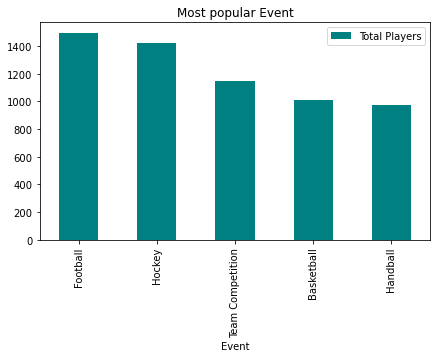

In [43]:
data=[]

for i in df['Event'].unique():
     data.append([i, len(df[df['Event'] == i])])
 
pd.DataFrame(data,columns = ['Event','Total Players']).sort_values(by = 'Total Players', ascending = False).head().plot(x = 'Event', y = 'Total Players', kind='bar', figsize=(7,4),color = 'teal')
plt.title("Most popular Event")

### 8. Which sport is having most female Gold Medalists? (Top 5)

Text(0.5, 1.0, 'Sport having the most Female Gold Medalists')

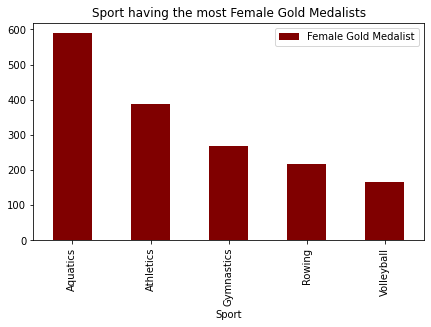

In [44]:
data=[]
for i in df["Sport"].unique():
    data.append([i,len(df[(df['Sport']==i) & (df["Medal"]=="Gold") & (df["Gender"]=="Women")])])
    
pd.DataFrame(data,columns = ['Sport','Female Gold Medalist']).sort_values(by='Female Gold Medalist', ascending=False).head().plot(x = 'Sport', y = 'Female Gold Medalist', kind = 'bar', figsize = (7,4),color = 'maroon')
plt.title("Sport having the most Female Gold Medalists")